# Section1：勾配消失問題

誤差逆伝播法が下位層に進んでいくに連れて、勾配がどんどん緩やかになっていく。 \
そのため、勾配降下法による、更新では下位層のパラメータはほとんど変わらず、訓練は最適値に収束しなくなる。

## 勾配消失問題のビジョン

### 活性化関数: シグモイド関数
- 0～1の間を緩やかに変化する関数で、ステップ関数ではON/OFFしかない状態に対し、信号の強弱を伝えられるようになり、予想ニューラルネットワーク普及のきっかけとなった。

#### 課題
- 大きな値では出力の変化が微小なため、勾配消失問題を引き起こす事があった。

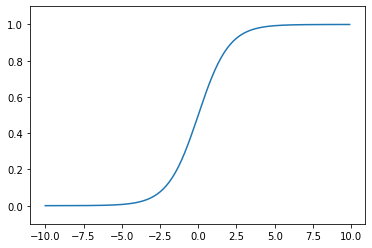

In [3]:
import numpy as np
import matplotlib.pyplot as plt
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

x = np.arange(-10.0 , 10.0, 0.1)
y1 = sigmoid(x)
plt.ylim(-0.1, 1.1)
plt.plot(x , y1)
plt.show()

#### シグモイド関数の微分

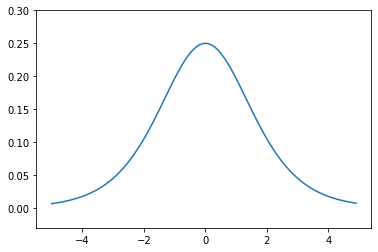

In [12]:
def sigmoid_d(x):
    return (1 -  sigmoid(x)) * sigmoid(x)

y2 = sigmoid_d(x)
plt.ylim(-0.03, 0.3)
plt.plot(x , y2)
plt.show()

シグモイド関数を微分した際の最大値が0.25が問題である。
中間層が増えていくと、微分結果として最大値0.25が増えていくため、入力層に近づくと学習結果が０に近づく事になる。

## 勾配消失の解決方

### 活性化関数の選択

#### 活性化関数: RELU関数
- 今最も使われている活性化関数  \
勾配消失問題の回避とスパース化に貢献することで良い成果をもたらしている。

\begin{aligned}
    f(x) = 
    \begin{cases}
        0 \quad (x \leqq 0) \\
        x \quad (x > 0) \\
    \end{cases}
\end{aligned}

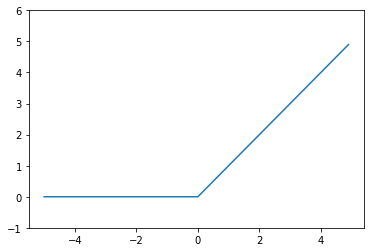

In [11]:
def relu(x):
    return np.maximum(0 , x)

x = np.arange(-5.0 , 5.0, 0.1)
y3 = relu(x)
plt.ylim(-1, 6)
plt.plot(x , y3)
plt.show()

#### ReLU関数の微分
微分の結果わかるのは、役に立たない項目が０、重要な項目が１という結果になる。

##### 良いこと
1. 勾配消失問題の回避（重要な項目には微分結果が１となるため、入力層に近づいても勾配が消失しない）
1. スパース化に貢献する（微分の結果が０になる場合は、その部分の重みが０になる。）

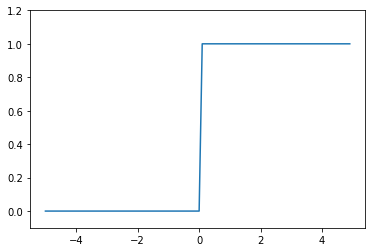

In [15]:
def relu_d(x):
    return np.where( x > 0, 1, 0)

y4 = relu_d(x)
plt.ylim(-0.1, 1.2)
plt.plot(x , y4)
plt.show()

### 重みの初期値の設定方法

#### 通常の初期値設定
正規分布に従った重みの初期値設定をする。
\begin{aligned}
f(x) = \frac{1}{\sqrt{2 \pi}} e^{- \frac{x^2}{2}}
\end{aligned}

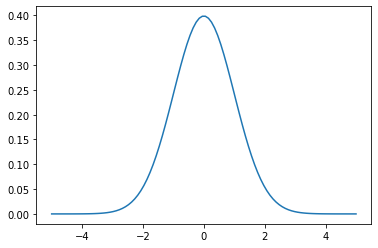

In [28]:
# 標準正規分布の描画

# probability density function ：確率密度関数
def pdf(x): 
    return (np.exp(-x**2/2)) / np.sqrt(2*np.pi)

x = np.linspace(-5.0 , 5.0, 100)

y5 = pdf(x)
plt.plot(x , y5)
plt.show()

#### 重みの初期値設定 Xavier
##### Xavierの初期値を設定する際の活性化関数
- シグモイド関数
- 双曲線正接関数

##### 設定方法
- 重みの要素を、前の層のノード数の平方根で除算した値

#### ゼロから作るディープラーニング　6.2.1 重みの初期値を０にする？

過学習を抑え、汎化性能を高めるテクニックとして、この後、Weight decay(荷重減衰）という手法を紹介します。 \
Weight decayとは、簡単に言えば、重みパラメータの値が小さくなるように学習を行う事を目的とした手法です。重みの値を小さくすることで、過学習が起きにくくなります。 \
重みを小さいに値にしたければ、初期値もできるだけ小さい値からスタートするのが正攻法でしょう。実際、これまで重みの初期値は、$0.01 * np.random.randn(10, 100)$のように、ガウス分布から生成される値を0.01倍した小さな値（標準偏差が0.01のガウス分布）を用いました。 \
重みの値を小さくいたいというのであれば、重みの初期値をすべて０に設定する、というのはどうでしょうか。答えを先に言ってしまうと、正しい学習が行えません。 \
なぜ、重みの初期値を０ににしてはいけない（正確には、重みを均一な値に設定してはいけない）のでしょうか。それは、誤差逆伝播法において、全ての重みの値が均一に（同じように）更新されてしまうからです。 \
この「重みが均一になってしまうこと」を防ぐ（正確には、重みの対照的な構造を崩す）ために、ランダムな初期値が必要なのです。

#### ゼロから作るディープラーニング　6.2.2　隠れ層のアクティベーション分布

５層のニューラルネットワークに、ランダムに生成したデータを流し、各層のアクティベーションのデータ分布をヒストグラムで描画します。 \
ここでは５つの層のそれぞれが、１００個のニューロンを持つものとします。そして、入力データとして１０００個のデータをガウス分布でランダムに生成し、５層ニューラルネットワークに流します。活性化関数にシグモイド関数を利用します。 \
このコードで注意すべき点は、重みのスケールについてです。このスケールを変えることで、アクティベーションの分布がどのように変化するかを観察することが、この実験の目的です。

図6-10に重みの初期値として標準偏差が１のガウス分布を用いています。 \
各層のアクティベーション分布は０と１に偏った分布になっている事がわかります。

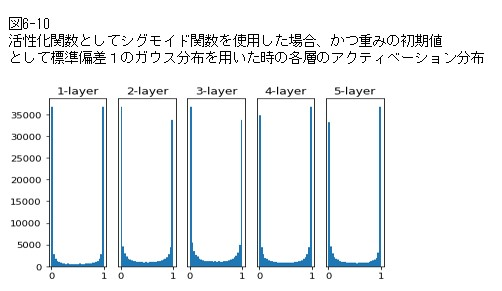

In [3]:
from IPython.display import Image
Image("./Section1_11_アクティベーション分布_標準正規分布.jpg")

次に標準偏差を0.01としたガウス分布の場合、各層のアクティベーションの分布は図6-11のようになります。 \
今度は、0.5付近に集中する分布となりました。先ほどの例のように０と１への偏りはないので、勾配消失の問題は起きていません。しかく、アクティベーションに偏りあるということは、表現力の点で大きなお問題があります。なぜなら、複数のニューロンがほとんど同じ値を出力するとすれば、複数のニューロンが存在する意味がなくなってしまうからです。

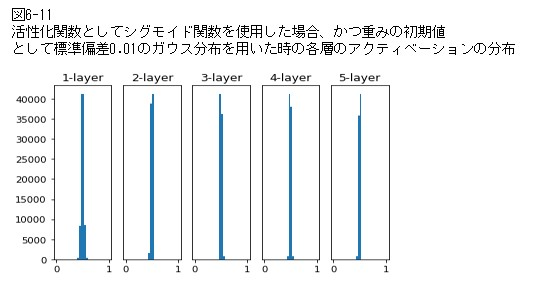

In [4]:
Image("./Section1_12_アクティベーション分布_標準正規分布.jpg")

続いて、「Xavierの初期値」を使ってみたいと思います。 \
「Xavierの初期値」を用いると、前層のノードの数が多ければ多いほど、対象ノードの初期値として設定する重みのスケールは小さくなります。
「Xavierの初期値」を使った結果は図6-12のようになります。この結果を見ると、上位の層に行くにつれて、ややいびつな形になりますが、これまでよりも広がりがあるので、シグモイド関数の表現も制限されることなく、効率的に学習が行えることが期待できます。

図6-12の分布は、上位層の分布の形状がややいびつな形状になりました。このいびつな形状は、`sigmoid`関数の代わりに、`tanh`関数（双曲線関数）を用いると改善されます。

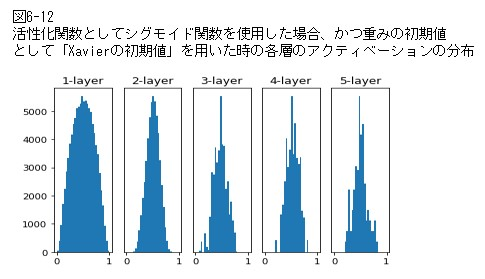

In [5]:
Image("./Section1_13_アクティベーション分布_Xavier.jpg")

#### 重みの初期値設定 He
##### Heの初期値を設定する際の活性化関数
- ReLU関数

##### 設定方法
- 重みの要素を、前の層のノード数の平方根で除算した値に対し√２をかけ合わせた値

#### ゼロから作るディープラーニング　6.2.3　ReLUの場合の重みの初期値

「Xavierの初期値」は、活性化関数が線形であることを前提に導いた結果です。`sigmoid`関数や`tanh`関数は左右対称で中央付近が線形関数としてみなせるので、「Xavierの初期値」が適してします。一方、ReLUを用いる場合は、ReLUに特化した初期値を用いる事が推奨されています。それは、「Heの初期値」です。 \
「Heの初期値」は前層のノードの数が、ｎ個の場合、$\sqrt{\frac{2}{n}}$を標準偏差とするガウス分布を用います。「Xavierの初期値」が$\sqrt{\frac{1}{n}}$であったことを考えると、ReLUの場合は負の領域が０になるため、より広がりを持たせるために倍の係数が必要になると（直感的には）解釈できます。

#### ゼロから作るディープラーニング　6.2.4 MNISTデータセットによる重み初期値の比較

重みの初期値の与え方の違いによって、ニューラルネットワークの学習にどれだけ影響を与えるか見てみましょう。 \
ここでは、「std=0.01」、「Xavierの初期値」、「Heの初期値」の３つのケースで実験を行います。 \
「std=0.01」の時は全く学習ができていません。 「Xavierの初期値」、「Heの初期値」の時は順調に学習が行われています。そして、「Heの初期値」の方が、学習の進みが早いこともわかります。

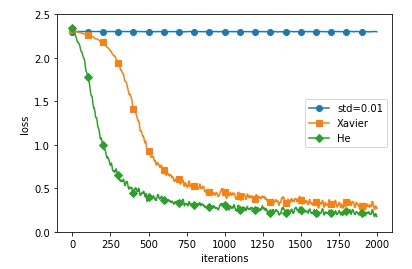

In [6]:
Image("./Section1_14_ReLU_学習の進み.jpg")

### バッチ正規化

- バッチ正規化とは︖
 - ミニバッチ単位で、入力値のデータの偏りを抑制する手法

- バッチ正規化の使い所とは︖
 - 活性化関数に値を渡す前後に、バッチ正規化の処理を孕んだ層を加える

#### バッチ正規化の数学的記述

1. ミニバッチの平均
\begin{aligned}
mu_t = \frac{1}{N_t} \sum_{i=1}^{N_i} X_{ni}
\end{aligned}
1. ミニバッチの分散
\begin{aligned}
\sigma_t^2 = \frac{1}{N_t} \sum_{i=1}^{N_t} (x_{ni} - \mu_t )^2
\end{aligned}
1. ミニバッチの正規化
\begin{aligned}
\hat{x_{ni}} = \frac{x_{ni} - \mu_t}{\sqrt{\sigma_t^2 + \theta }}
\end{aligned}
1. 変倍・移動
\begin{aligned}
y_{ni} = \gamma x_{ni} + \beta
\end{aligned}

##### 処理および記号の説明
$\mu$　：　ミニバッチ$t$全体の平均 \
$\sigma_t^2$　：　ミニバッチ$t$全体の標準偏差 \
$N_t$　：　ミニバッチのインデックス \
$\hat{x_{ni}}$　：　０に値を近づける計算（０を中心とするセンタリング）と正規化を施した値 \
$\gamma$　：　スケーリングパラメータ \
$\beta$　：　シフトパラメータ \
$y_{ni}$　：　ミニバッチのインデックス値とスケーリングの積にシフトを加算した値（バッチ正規化オペレーションの出力）

#### ゼロから作るディープラーニング　4.2.3 ミニバッチ学習

MNISTのデータセットは訓練データが60,000個ありました。そのため、全てのデータを対象にして損失関数の和を求めるには少々時間がかかってしまいます。また、ビッグデータともなれば、その数は数百万、数千万といったオーダーの巨大なデータになります。その場合、すべてのデータを対象とした損失関数を計算するのは現実的ではありません。そこで、データの中から一部を選び出し、その一部のデータを全体の「近似」として利用します。ニューラルネットワークの学習においても、訓練データからある枚数だけを選び出し、（これをミニバッチ（小さな塊）という）そのミニバッチごとに学習を行います。

#### ゼロから作るディープラーニング　6.3　Batch Normalization

前節の「6.2 重みの初期値」では、重みの初期値を適切に設定すれば、各層のアクティベーションの分布は適度な広がりを持ち、学習がスムーズに行えるということでした。それでは、各層で適度な広がりを持つように、”強制的”にアクティベーションの分布を調整してみてはどうでしょうか。実は、そのようなアイデアをベースとする手法がBatch Normalizationなのです。

#### ゼロから作るディープラーニング　6.3.1　Batch Normalizationのアルゴリズム

Batch Normalizationには次の利点があるため、多くの研究者や技術者に広く使われています。
- 学習を早く進行させることができる。（学習係数を大きくすることができる）
- 初期値にそれほど依存しない（初期値に対してそこまで神経質にならなくてよい）
- 過学習を抑制する（Dropoutなどの必要性を減らす）

# 実装演習
## 重みの初期値設定 (2_2_2_vanishing_gradient_modified.ipynb)

In [30]:
import sys, os
sys.path.append(os.pardir)
from data.mnist import load_mnist
from common import layers
from common import functions

import numpy as np
import matplotlib.pyplot as plt
from collections import OrderedDict

In [42]:
class MultiLayerNet:
    '''
    input_size: 入力層のノード数
    hidden_size_list: 隠れ層のノード数のリスト
    output_size: 出力層のノード数
    activation: 活性化関数
    weight_init_std: 重みの初期化方法
    '''
    def __init__(self, input_size, hidden_size_list, output_size, activation='relu', weight_init_std='relu'):
        self.input_size = input_size
        self.output_size = output_size
        self.hidden_size_list = hidden_size_list
        self.hidden_layer_num = len(hidden_size_list)
        self.params = {}

        # 重みの初期化
        self.__init_weight(weight_init_std)

        # レイヤの生成, sigmoidとreluのみ扱う
        activation_layer = {'sigmoid': layers.Sigmoid, 'relu': layers.Relu}
        self.layers = OrderedDict() # 追加した順番に格納
        for idx in range(1, self.hidden_layer_num+1):
            self.layers['Affine' + str(idx)] = layers.Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])
            self.layers['Activation_function' + str(idx)] = activation_layer[activation]()

        idx = self.hidden_layer_num + 1
        self.layers['Affine' + str(idx)] = layers.Affine(self.params['W' + str(idx)], self.params['b' + str(idx)])

        self.last_layer = layers.SoftmaxWithLoss()
    
    ### ◆◆◆　重みの初期値　◆◆◆
    def __init_weight(self, weight_init_std):
        all_size_list = [self.input_size] + self.hidden_size_list + [self.output_size]
        for idx in range(1, len(all_size_list)):
            scale = weight_init_std
            if str(weight_init_std).lower() in ('relu', 'he'):
                scale = np.sqrt(2.0 / all_size_list[idx - 1])
            elif str(weight_init_std).lower() in ('sigmoid', 'xavier'):
                scale = np.sqrt(1.0 / all_size_list[idx - 1])

            self.params['W' + str(idx)] = scale * np.random.randn(all_size_list[idx-1], all_size_list[idx])
            self.params['b' + str(idx)] = np.zeros(all_size_list[idx])

    def predict(self, x):
        for layer in self.layers.values():
            x = layer.forward(x)

        return x

    def loss(self, x, d):
        y = self.predict(x)

        weight_decay = 0
        for idx in range(1, self.hidden_layer_num + 2):
            W = self.params['W' + str(idx)]

        return self.last_layer.forward(y, d) + weight_decay

    def accuracy(self, x, d):
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        if d.ndim != 1 : d = np.argmax(d, axis=1)

        accuracy = np.sum(y == d) / float(x.shape[0])
        return accuracy

    def gradient(self, x, d):
        # forward
        self.loss(x, d)

        # backward
        dout = 1
        dout = self.last_layer.backward(dout)

        layers = list(self.layers.values())
        layers.reverse()
        for layer in layers:
            dout = layer.backward(dout)

        # 設定
        grad = {}
        for idx in range(1, self.hidden_layer_num+2):
            grad['W' + str(idx)] = self.layers['Affine' + str(idx)].dW
            grad['b' + str(idx)] = self.layers['Affine' + str(idx)].db

        return grad


### 勾配消失問題のサンプル

### シグモイド関数の場合
重みの初期値はガウス分布 \
※`weight_init_std=0.01`で指定している

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.1
                : 200. 正答率(テスト) = 0.1135
Generation: 400. 正答率(トレーニング) = 0.15
                : 400. 正答率(テスト) = 0.1135
Generation: 600. 正答率(トレーニング) = 0.15
                : 600. 正答率(テスト) = 0.1135
Generation: 800. 正答率(トレーニング) = 0.13
                : 800. 正答率(テスト) = 0.1135
Generation: 1000. 正答率(トレーニング) = 0.07
                : 1000. 正答率(テスト) = 0.1135
Generation: 1200. 正答率(トレーニング) = 0.15
                : 1200. 正答率(テスト) = 0.101
Generation: 1400. 正答率(トレーニング) = 0.1
                : 1400. 正答率(テスト) = 0.1135
Generation: 1600. 正答率(トレーニング) = 0.13
                : 1600. 正答率(テスト) = 0.1028
Generation: 1800. 正答率(トレーニング) = 0.14
                : 1800. 正答率(テスト) = 0.1009
Generation: 2000. 正答率(トレーニング) = 0.11
                : 2000. 正答率(テスト) = 0.1135


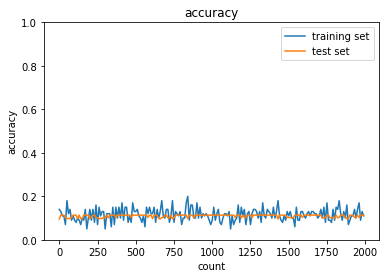

In [39]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std=0.01)

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        ## ●●●ログ出力の件数が多いため、２００回に１回出力するように修正●●●
        if (i + 1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="upper right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### ReLU関数の場合 
重みの初期値はガウス分布 \
※`weight_init_std=0.01`で指定している

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.12
                : 200. 正答率(テスト) = 0.1135
Generation: 400. 正答率(トレーニング) = 0.1
                : 400. 正答率(テスト) = 0.1135
Generation: 600. 正答率(トレーニング) = 0.21
                : 600. 正答率(テスト) = 0.1475
Generation: 800. 正答率(トレーニング) = 0.59
                : 800. 正答率(テスト) = 0.6194
Generation: 1000. 正答率(トレーニング) = 0.79
                : 1000. 正答率(テスト) = 0.77
Generation: 1200. 正答率(トレーニング) = 0.89
                : 1200. 正答率(テスト) = 0.838
Generation: 1400. 正答率(トレーニング) = 0.84
                : 1400. 正答率(テスト) = 0.8573
Generation: 1600. 正答率(トレーニング) = 0.95
                : 1600. 正答率(テスト) = 0.9
Generation: 1800. 正答率(トレーニング) = 0.94
                : 1800. 正答率(テスト) = 0.9102
Generation: 2000. 正答率(トレーニング) = 0.95
                : 2000. 正答率(テスト) = 0.9149


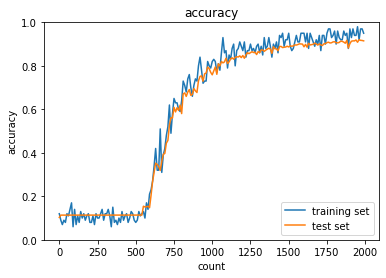

In [43]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std=0.01)

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        ## ●●●ログ出力の件数が多いため、２００回に１回出力するように修正●●●
        if (i + 1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        
        
lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### シグモイド関数の場合
重みの初期値はXavier

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.5
                : 200. 正答率(テスト) = 0.423
Generation: 400. 正答率(トレーニング) = 0.58
                : 400. 正答率(テスト) = 0.5722
Generation: 600. 正答率(トレーニング) = 0.6
                : 600. 正答率(テスト) = 0.6527
Generation: 800. 正答率(トレーニング) = 0.71
                : 800. 正答率(テスト) = 0.7344
Generation: 1000. 正答率(トレーニング) = 0.8
                : 1000. 正答率(テスト) = 0.7886
Generation: 1200. 正答率(トレーニング) = 0.85
                : 1200. 正答率(テスト) = 0.8193
Generation: 1400. 正答率(トレーニング) = 0.9
                : 1400. 正答率(テスト) = 0.8387
Generation: 1600. 正答率(トレーニング) = 0.91
                : 1600. 正答率(テスト) = 0.8562
Generation: 1800. 正答率(トレーニング) = 0.86
                : 1800. 正答率(テスト) = 0.8673
Generation: 2000. 正答率(トレーニング) = 0.83
                : 2000. 正答率(テスト) = 0.8786


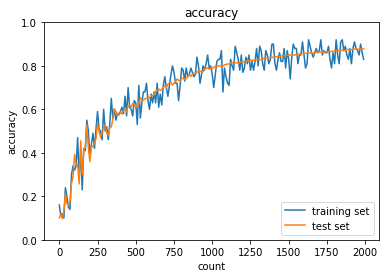

In [44]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std='Xavier')

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        ## ●●●ログ出力の件数が多いため、２００回に１回出力するように修正●●●
        if (i + 1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### シグモイド関数の場合  （[try] sigmoid - Heについても試してみよう）
重みの初期値はHe

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.55
                : 200. 正答率(テスト) = 0.5592
Generation: 400. 正答率(トレーニング) = 0.71
                : 400. 正答率(テスト) = 0.6339
Generation: 600. 正答率(トレーニング) = 0.77
                : 600. 正答率(テスト) = 0.7418
Generation: 800. 正答率(トレーニング) = 0.73
                : 800. 正答率(テスト) = 0.8
Generation: 1000. 正答率(トレーニング) = 0.88
                : 1000. 正答率(テスト) = 0.8344
Generation: 1200. 正答率(トレーニング) = 0.86
                : 1200. 正答率(テスト) = 0.8579
Generation: 1400. 正答率(トレーニング) = 0.89
                : 1400. 正答率(テスト) = 0.8726
Generation: 1600. 正答率(トレーニング) = 0.87
                : 1600. 正答率(テスト) = 0.8818
Generation: 1800. 正答率(トレーニング) = 0.9
                : 1800. 正答率(テスト) = 0.8887
Generation: 2000. 正答率(トレーニング) = 0.91
                : 2000. 正答率(テスト) = 0.8957


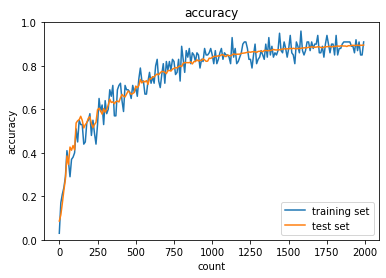

In [46]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='sigmoid', weight_init_std='He')

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        ## ●●●ログ出力の件数が多いため、２００回に１回出力するように修正●●●
        if (i + 1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### ReLU関数の場合 （[try] relu - Xavierについても試してみよう）
重みの初期値はXavier

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.94
                : 200. 正答率(テスト) = 0.8876
Generation: 400. 正答率(トレーニング) = 0.93
                : 400. 正答率(テスト) = 0.9055
Generation: 600. 正答率(トレーニング) = 0.93
                : 600. 正答率(テスト) = 0.9292
Generation: 800. 正答率(トレーニング) = 0.95
                : 800. 正答率(テスト) = 0.932
Generation: 1000. 正答率(トレーニング) = 0.99
                : 1000. 正答率(テスト) = 0.9419
Generation: 1200. 正答率(トレーニング) = 0.98
                : 1200. 正答率(テスト) = 0.9408
Generation: 1400. 正答率(トレーニング) = 0.96
                : 1400. 正答率(テスト) = 0.9443
Generation: 1600. 正答率(トレーニング) = 0.99
                : 1600. 正答率(テスト) = 0.9458
Generation: 1800. 正答率(トレーニング) = 0.97
                : 1800. 正答率(テスト) = 0.9536
Generation: 2000. 正答率(トレーニング) = 0.95
                : 2000. 正答率(テスト) = 0.9503


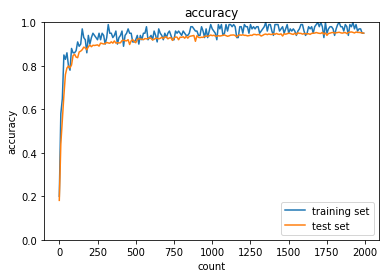

In [48]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='Xavier')

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        ## ●●●ログ出力の件数が多いため、２００回に１回出力するように修正●●●
        if (i + 1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### ReLU関数の場合
重みの初期値はHe

データ読み込み完了
Generation: 200. 正答率(トレーニング) = 0.91
                : 200. 正答率(テスト) = 0.8964
Generation: 400. 正答率(トレーニング) = 0.97
                : 400. 正答率(テスト) = 0.9185
Generation: 600. 正答率(トレーニング) = 0.97
                : 600. 正答率(テスト) = 0.9297
Generation: 800. 正答率(トレーニング) = 0.98
                : 800. 正答率(テスト) = 0.9363
Generation: 1000. 正答率(トレーニング) = 0.97
                : 1000. 正答率(テスト) = 0.9404
Generation: 1200. 正答率(トレーニング) = 0.97
                : 1200. 正答率(テスト) = 0.9414
Generation: 1400. 正答率(トレーニング) = 0.99
                : 1400. 正答率(テスト) = 0.9469
Generation: 1600. 正答率(トレーニング) = 0.95
                : 1600. 正答率(テスト) = 0.9453
Generation: 1800. 正答率(トレーニング) = 0.98
                : 1800. 正答率(テスト) = 0.9544
Generation: 2000. 正答率(トレーニング) = 0.97
                : 2000. 正答率(テスト) = 0.956


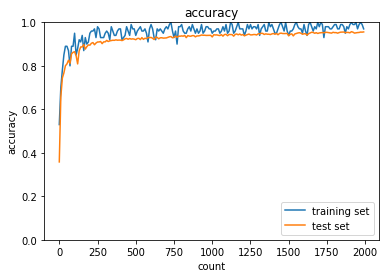

In [47]:
# データの読み込み
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True, one_hot_label=True)

print("データ読み込み完了")

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10, activation='relu', weight_init_std='He')

iters_num = 2000
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    # 勾配
    grad = network.gradient(x_batch, d_batch)
    
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, d_batch)
    train_loss_list.append(loss)
    
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        ## ●●●ログ出力の件数が多いため、２００回に１回出力するように修正●●●
        if (i + 1) % 200 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
        

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

##  [try] hidden_size_listの数字を変更してみよう

結果の画像のみとしています。  \
実行結果は、URLとして提出していませんが、同じフォルダ内の「Section1 ：try　勾配消失問題.ipynb」にあります。

### シグモイド関数の場合
#### 重みの初期値はガウス分布

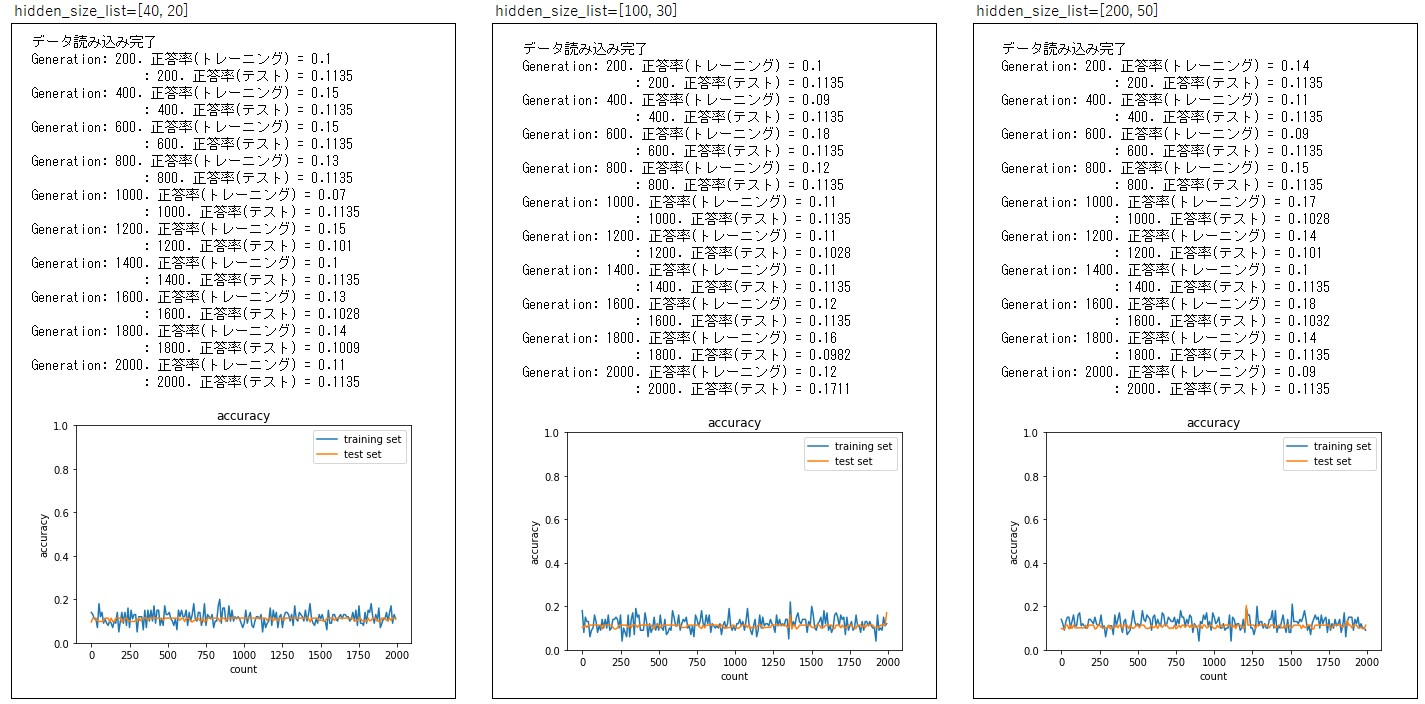

In [2]:
Image("./Section1_01_シグモイド関数＿標準正規分布.jpg")

#### 重みの初期値はXavier

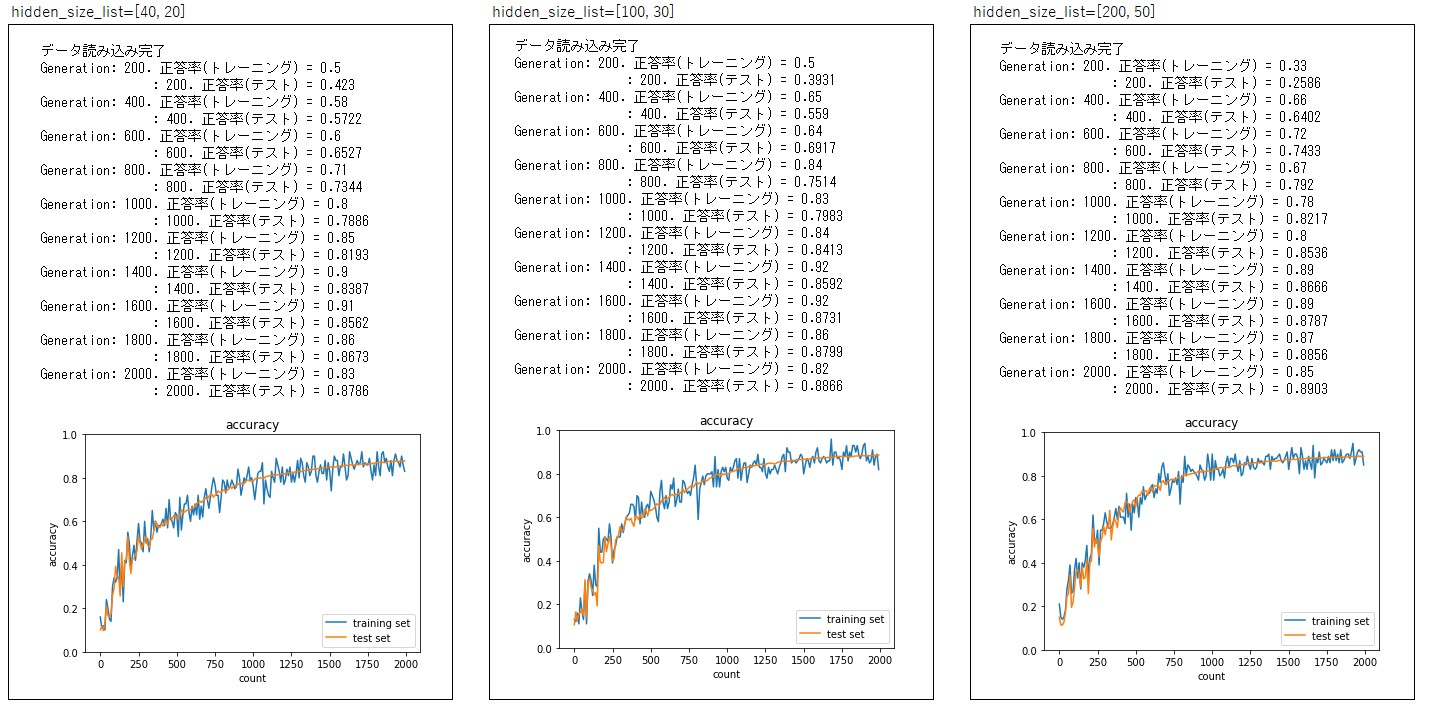

In [54]:
Image("./Section1_02_シグモイド関数＿Xavier.jpg")

#### 重みの初期値はHe

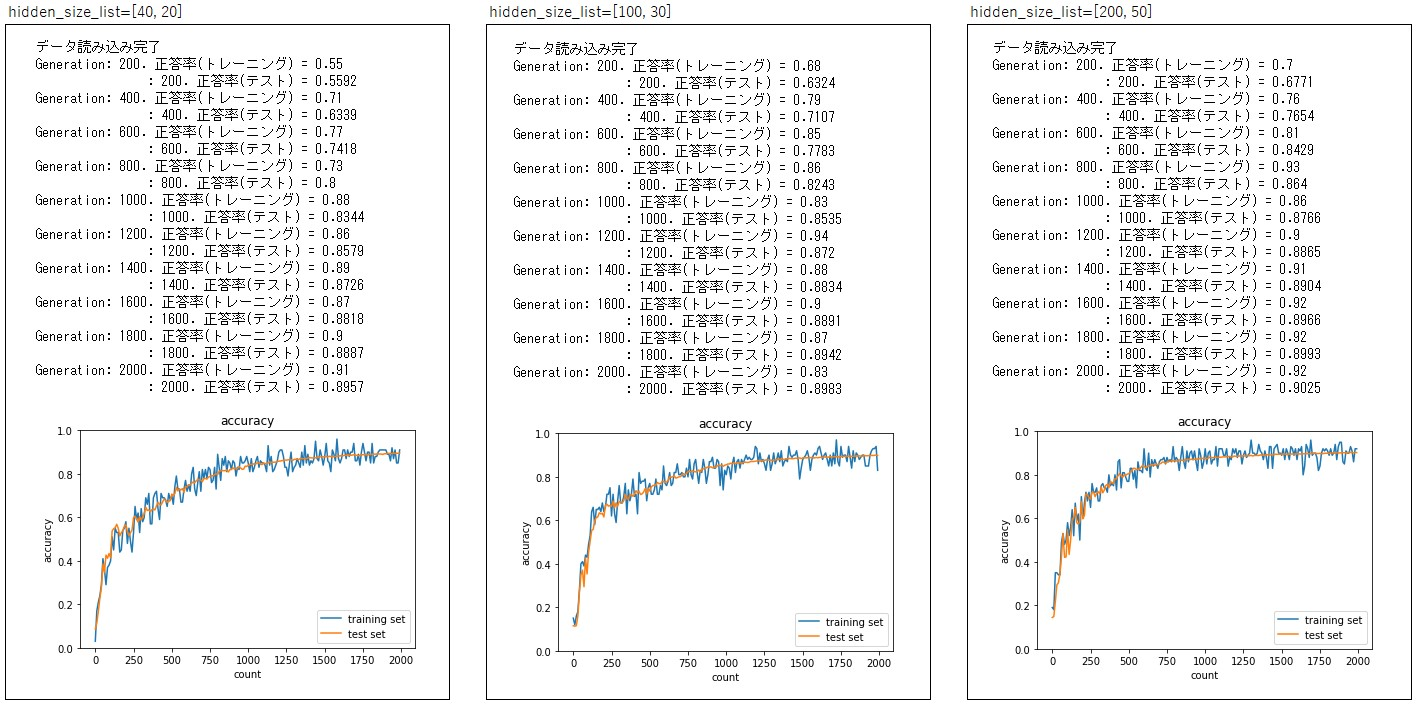

In [55]:
Image("./Section1_03_シグモイド関数＿He.jpg")

### ReLU関数の場合
#### 重みの初期値はガウス分布

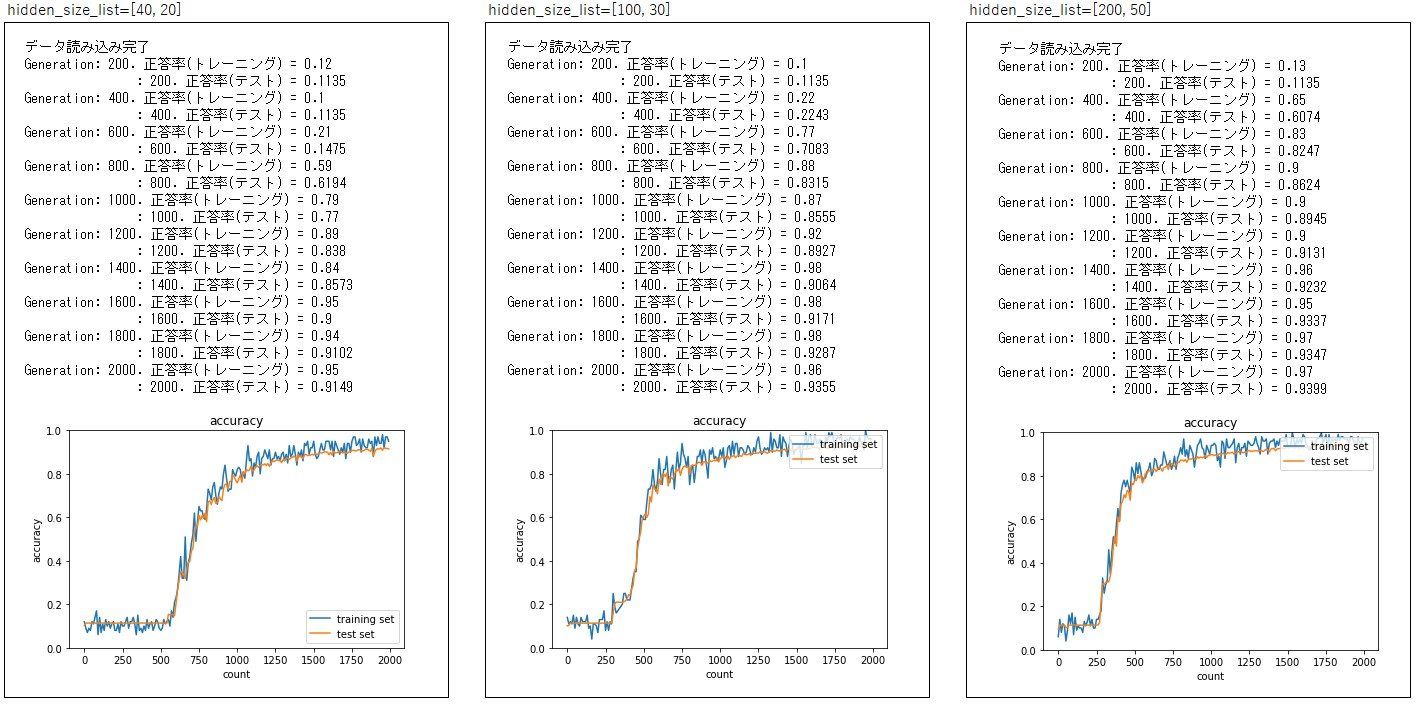

In [56]:
Image("./Section1_04_ReLU関数＿標準正規分布.jpg")

#### 重みの初期値はXavier

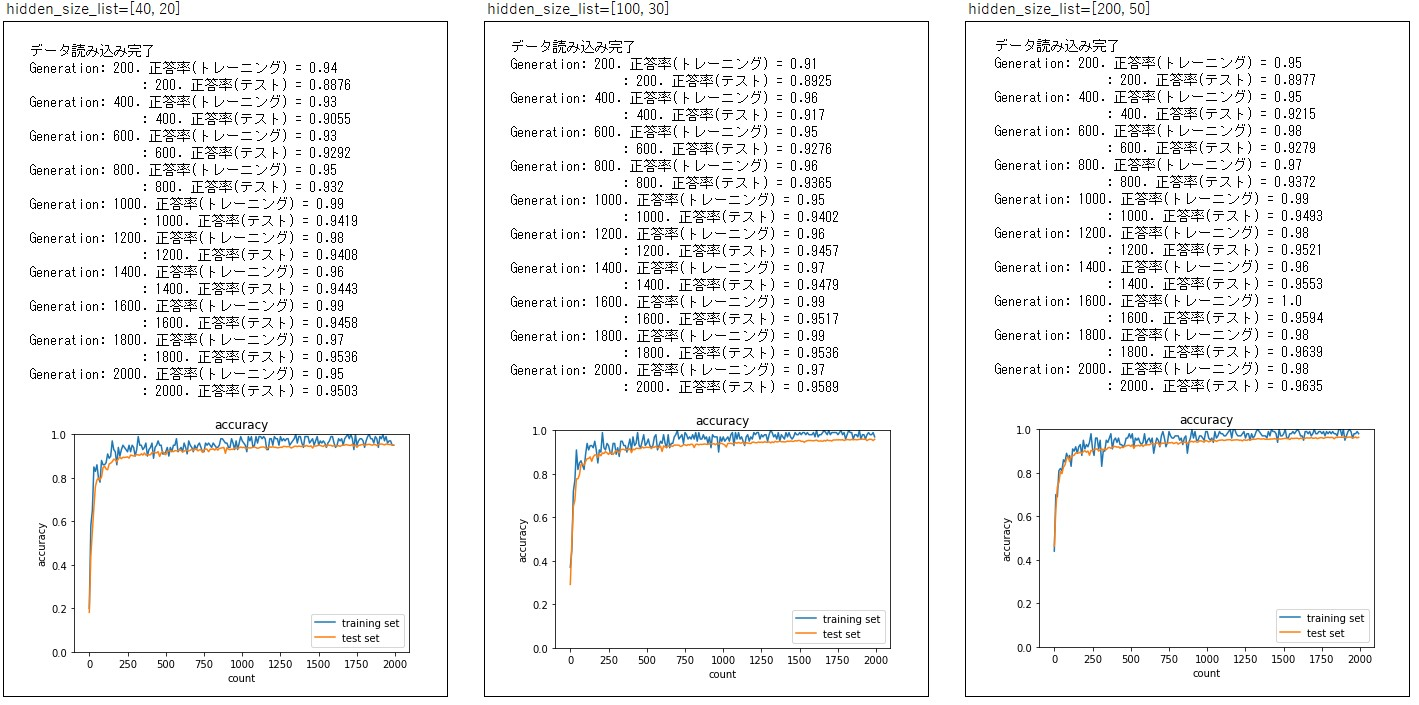

In [57]:
Image("./Section1_05_ReLU関数＿Xavier.jpg")

#### 重みの初期値はHe

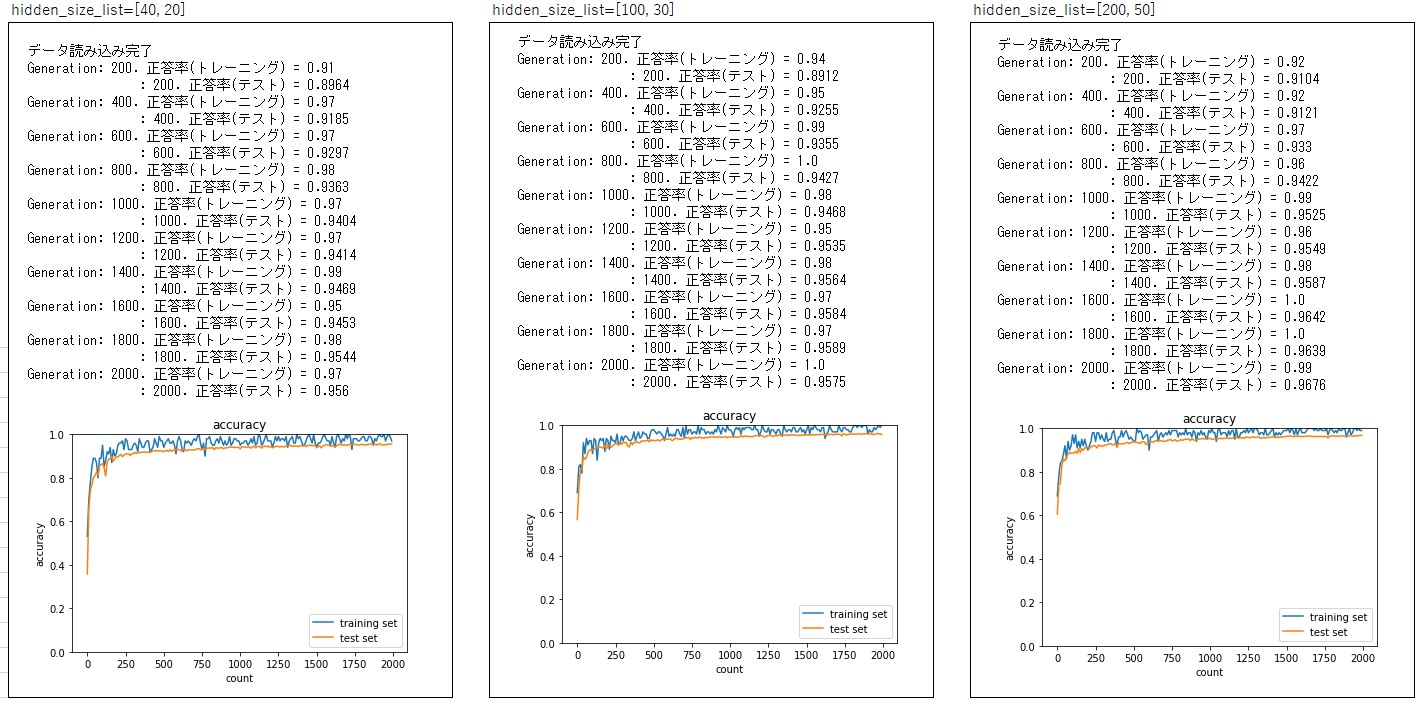

In [58]:
Image("./Section1_06_ReLU関数＿He.jpg")

## バッチ正規化（2_3_batch_normalization）

In [60]:
from common.multi_layer_net import MultiLayerNet

In [61]:
# バッチ正則化 layer
class BatchNormalization:
    '''
    gamma: スケール係数
    beta: オフセット
    momentum: 慣性
    running_mean: テスト時に使用する平均
    running_var: テスト時に使用する分散
    '''
    def __init__(self, gamma, beta, momentum=0.9, running_mean=None, running_var=None):
        self.gamma = gamma
        self.beta = beta
        self.momentum = momentum
        self.input_shape = None

        self.running_mean = running_mean
        self.running_var = running_var  
        
        # backward時に使用する中間データ
        self.batch_size = None
        self.xc = None
        self.std = None
        self.dgamma = None
        self.dbeta = None

    def forward(self, x, train_flg=True):
        if self.running_mean is None:
            N, D = x.shape
            self.running_mean = np.zeros(D)
            self.running_var = np.zeros(D)
                        
        if train_flg:
            mu = x.mean(axis=0) # 平均
            xc = x - mu # xをセンタリング
            var = np.mean(xc**2, axis=0) # 分散
            std = np.sqrt(var + 10e-7) # スケーリング
            xn = xc / std
            
            self.batch_size = x.shape[0]
            self.xc = xc
            self.xn = xn
            self.std = std
            self.running_mean = self.momentum * self.running_mean + (1-self.momentum) * mu # 平均値の加重平均
            self.running_var = self.momentum * self.running_var + (1-self.momentum) * var #分散値の加重平均
        else:
            xc = x - self.running_mean
            xn = xc / ((np.sqrt(self.running_var + 10e-7)))
            
        out = self.gamma * xn + self.beta 
        
        return out

    def backward(self, dout):
        dbeta = dout.sum(axis=0)
        dgamma = np.sum(self.xn * dout, axis=0)
        dxn = self.gamma * dout
        dxc = dxn / self.std
        dstd = -np.sum((dxn * self.xc) / (self.std * self.std), axis=0)
        dvar = 0.5 * dstd / self.std
        dxc += (2.0 / self.batch_size) * self.xc * dvar
        dmu = np.sum(dxc, axis=0)
        dx = dxc - dmu / self.batch_size
        
        self.dgamma = dgamma
        self.dbeta = dbeta

        return dx    


データ読み込み完了
Generation: 100. 正答率(トレーニング) = 0.23
                : 100. 正答率(テスト) = 0.2414
Generation: 200. 正答率(トレーニング) = 0.63
                : 200. 正答率(テスト) = 0.6061
Generation: 300. 正答率(トレーニング) = 0.68
                : 300. 正答率(テスト) = 0.6491
Generation: 400. 正答率(トレーニング) = 0.68
                : 400. 正答率(テスト) = 0.6736
Generation: 500. 正答率(トレーニング) = 0.68
                : 500. 正答率(テスト) = 0.7103
Generation: 600. 正答率(トレーニング) = 0.72
                : 600. 正答率(テスト) = 0.7361
Generation: 700. 正答率(トレーニング) = 0.71
                : 700. 正答率(テスト) = 0.7368
Generation: 800. 正答率(トレーニング) = 0.73
                : 800. 正答率(テスト) = 0.7545
Generation: 900. 正答率(トレーニング) = 0.76
                : 900. 正答率(テスト) = 0.7719
Generation: 1000. 正答率(トレーニング) = 0.75
                : 1000. 正答率(テスト) = 0.7842


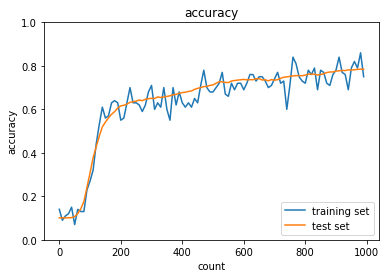

In [64]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")


# batch_normalizationの設定 =======================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10,
                        activation='sigmoid', weight_init_std='Xavier', use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        ## ●●●ログ出力の件数が多いため、１００回に１回出力するように修正●●●
        if (i + 1) % 100 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

### [try] 活性化関数や重みの初期値を変えてみよう
activation='sigmoid', weight_init_std='Xavier'
　↓
activation='relu', weight_init_std='He'

データ読み込み完了
Generation: 100. 正答率(トレーニング) = 0.7
                : 100. 正答率(テスト) = 0.6488
Generation: 200. 正答率(トレーニング) = 0.75
                : 200. 正答率(テスト) = 0.7658
Generation: 300. 正答率(トレーニング) = 0.75
                : 300. 正答率(テスト) = 0.8144
Generation: 400. 正答率(トレーニング) = 0.82
                : 400. 正答率(テスト) = 0.8507
Generation: 500. 正答率(トレーニング) = 0.84
                : 500. 正答率(テスト) = 0.8696
Generation: 600. 正答率(トレーニング) = 0.84
                : 600. 正答率(テスト) = 0.8812
Generation: 700. 正答率(トレーニング) = 0.85
                : 700. 正答率(テスト) = 0.8905
Generation: 800. 正答率(トレーニング) = 0.92
                : 800. 正答率(テスト) = 0.8946
Generation: 900. 正答率(トレーニング) = 0.93
                : 900. 正答率(テスト) = 0.8998
Generation: 1000. 正答率(トレーニング) = 0.88
                : 1000. 正答率(テスト) = 0.9052


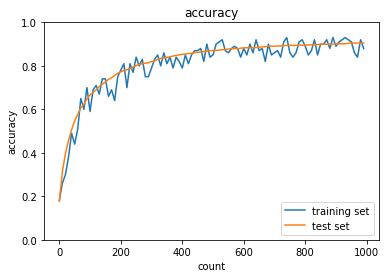

In [65]:
(x_train, d_train), (x_test, d_test) = load_mnist(normalize=True)

print("データ読み込み完了")


# batch_normalizationの設定 =======================
use_batchnorm = True
# use_batchnorm = False
# ====================================================

network = MultiLayerNet(input_size=784, hidden_size_list=[40, 20], output_size=10,
                        activation='relu', weight_init_std='He', use_batchnorm=use_batchnorm)

iters_num = 1000
train_size = x_train.shape[0]
batch_size = 100
learning_rate=0.01

train_loss_list = []
accuracies_train = []
accuracies_test = []

plot_interval=10


for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    d_batch = d_train[batch_mask]

    grad = network.gradient(x_batch, d_batch)
    for key in ('W1', 'W2', 'W3', 'b1', 'b2', 'b3'):
        network.params[key] -= learning_rate * grad[key]

        loss = network.loss(x_batch, d_batch)
        train_loss_list.append(loss)        
        
    if (i + 1) % plot_interval == 0:
        accr_test = network.accuracy(x_test, d_test)
        accuracies_test.append(accr_test)        
        accr_train = network.accuracy(x_batch, d_batch)
        accuracies_train.append(accr_train)
        
        ## ●●●ログ出力の件数が多いため、１００回に１回出力するように修正●●●
        if (i + 1) % 100 == 0:
            print('Generation: ' + str(i+1) + '. 正答率(トレーニング) = ' + str(accr_train))
            print('                : ' + str(i+1) + '. 正答率(テスト) = ' + str(accr_test))
                

lists = range(0, iters_num, plot_interval)
plt.plot(lists, accuracies_train, label="training set")
plt.plot(lists, accuracies_test,  label="test set")
plt.legend(loc="lower right")
plt.title("accuracy")
plt.xlabel("count")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
# グラフの表示
plt.show()

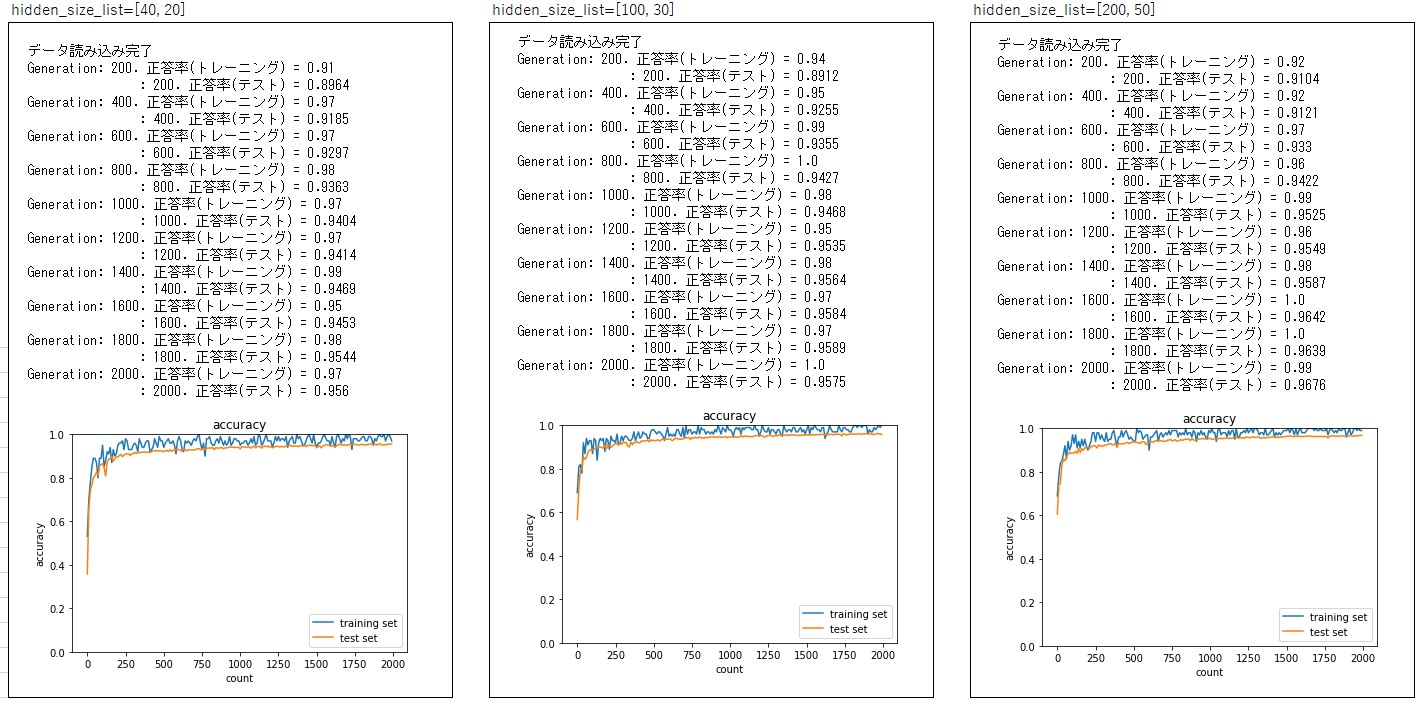

In [66]:
Image("./Section1_06_ReLU関数＿He.jpg")

# 確認テスト

#### P10

問） \
連鎖律の原理を使い、dz/dxを求めよ。 \
z = t2 \
t = x +y10 

答）
\begin{aligned}
\frac{\partial z}{\partial t} &= 2t \\[6px]
\frac{\partial t}{\partial x} &= 1 \\[6px]
\frac{\partial z}{\partial t} \frac{\partial t}{\partial x} &= 2t \times 1 \\[6px]
&= 2t
\end{aligned}

#### P18

問）
シグモイド関数を微分した時、入力値が0の時に最大値をとる。その値として正しいものを選択肢から選べ。 \
（1）0.15 \
（2）0.25 \
（3）0.35 \
（4）0.45

答）（2）0.25

シグモイド関数
\begin{aligned}
y = \frac{1}{1 \; + \; e^{-x}}
\end{aligned}

微分しやすいように式を変換する。
\begin{aligned}
u &= 1 \; + \; e^{-x}  \\[6px]
y &= u^{-1}
\end{aligned}

微分する
\begin{aligned}
\frac{\partial u}{\partial x} &=  e^{-x}  \\[6px]
\frac{\partial y}{\partial u} &= -u^{-2}
\end{aligned}

連鎖律
\begin{aligned}
\frac{\partial y}{\partial x} &= \frac{\partial y}{\partial u} \cdot \frac{\partial u}{\partial x} \\[8px]
&= (-u^{-2}) (-e^{-x})  \\[6px]
&= \frac{e^{-x}}{(1 \; + \; e^{-x})^2} \\[6px]
&=   \frac{ e^{-x}}{1 \; + \; e^{-x}} \cdot \frac{1}{1 \; + \; e^{-x}} 
\end{aligned}

右辺の左側を変形する。
\begin{aligned}
\frac{\partial y}{\partial x} &= \left( \frac{1 \; + \; e^{-x}}{1 \; + \; e^{-x}} - \frac{1}{1 \; + \; e^{-x}} \right) \frac{1}{1 \; + \; e^{-x}} \\[6px]
&= (1 - y) \cdot y
\end{aligned}

In [26]:
import numpy as np

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# シグモイド関数に０を渡した結果
y = sigmoid(0)
print(y)

0.5


In [23]:
# シグモイド関数の導関数を実行する
print((1 - y) * y)

0.25


#### P26

問）
重みの初期値に0を設定すると、どのような問題が発生するか。簡潔に説明せよ。

答） 
- 正しい学習が行えない。
- すべての重みの値が均一に更新されるため、多数の重みをもつ意味がなくなる。

#### P29

問）一般的に考えられるバッチ正規化の効果を2点挙げよ。

答） 
- 中間層の重みの更新が安定化する。⇒学習がスピードアップする。
- 過学習を抑えることができる。　⇒学習データの極端なばらつきを